In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
def to_timestamp(dt):
    return dt.timestamp()

In [3]:
data = pd.read_csv('dog_rates_tweets.csv')

In [4]:
numeric_rating = r'(\d+(\-\d+)?)/10'
data['rating'] = data['text'].str.extract(numeric_rating, expand=False)[0]
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data = data[data['rating'].notnull()]
data = data[data['rating'] <= 25]
data['created_at'] = pd.to_datetime(data['created_at'])
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [5]:
fit = linregress(data['timestamp'], data['rating'])

In [6]:
print(f"P-value for the slope: {fit.pvalue}")

P-value for the slope: 1.340859080165658e-119


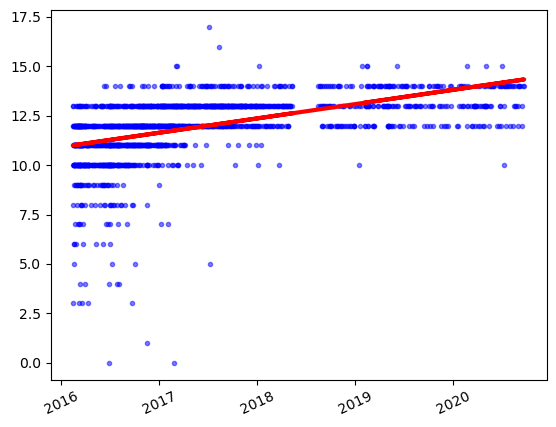

In [7]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp'] * fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

In [8]:
residuals = data['rating'] - (data['timestamp'] * fit.slope + fit.intercept)

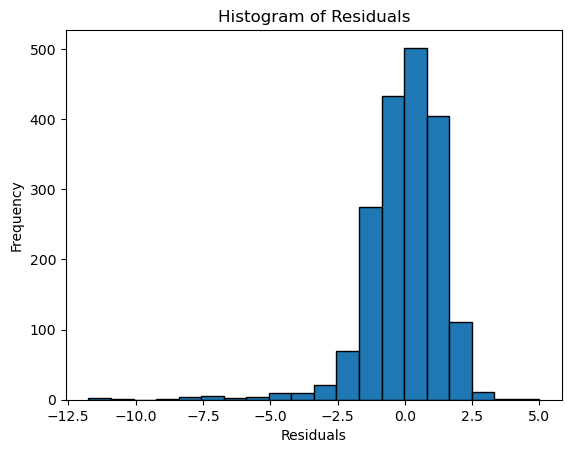

In [9]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

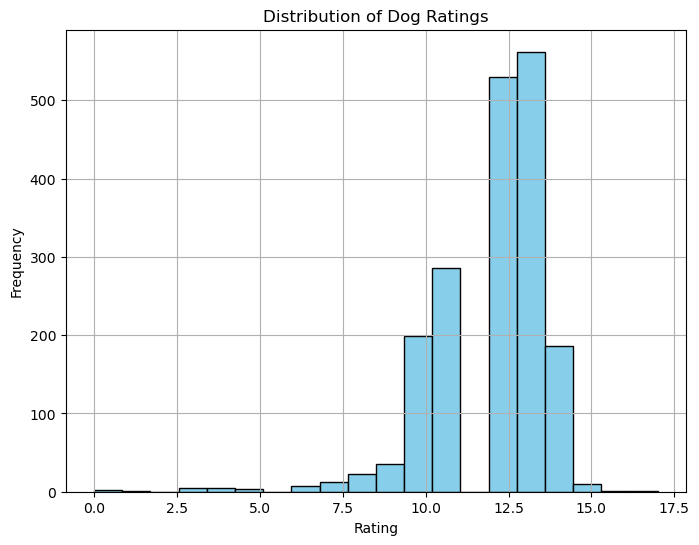

In [10]:
# Create a histogram of dog ratings
plt.figure(figsize=(8, 6))
plt.hist(data['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Dog Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()